In [18]:
import numpy as np
import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score

#Decision Tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#LR
from sklearn.linear_model import LinearRegression

#XGB
from xgboost import XGBRegressor

#KNN
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [2]:
df = pd.read_csv('aac_data.csv')
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


The full dataset has 29421 rows and 37 columns


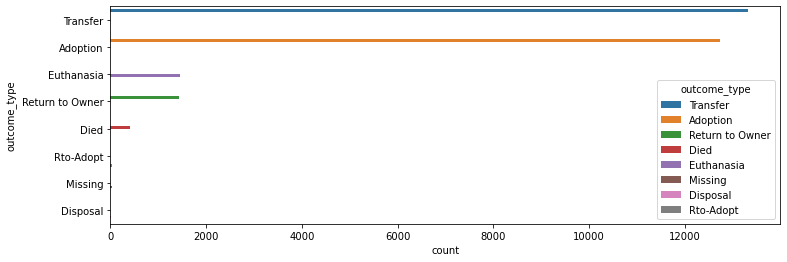

In [3]:
#Exploring the Dataset
nRow, nCol = df.shape
print(f'The full dataset has {nRow} rows and {nCol} columns')

df.groupby(['outcome_type', 'outcome_subtype']).size()

#Looking at Distribution of Outcome
plt.figure(figsize = (12, 4))
sns.countplot(data = df, y = 'outcome_type', hue = 'outcome_type', 
              order = df['outcome_type'].value_counts().index, orient = 'h')
plt.show()

In [4]:
#Feature Selection
df.age_upon_outcome.unique()
#making my own age column since the age_upon_outcome sucks for coding
df.dtypes
#since datetime and dob are objects I have to convert to datetime dtype
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d')
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format = '%Y-%m-%d')
df['age_days'] = (df['datetime'] - df['date_of_birth']).dt.days
df.drop(columns = ['age_upon_outcome', 'datetime'])

,animal_id,animal_type,breed,color,date_of_birth,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,...,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat,age_days
0,A684346,Cat,domestic shorthair,orange,2014-07-07,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,...,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange,15
1,A685067,Cat,domestic shorthair,blue /white,2014-06-16,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female,...,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue,59
2,A678580,Cat,domestic shorthair,white/black,2014-03-26,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female,...,17,domestic shorthair,NaN,False,True,NaN,white,black,white,95
3,A675405,Cat,domestic mediumhair,black/white,2013-03-27,2014-03-28T14:55:00,Stella Luna,NaN,Return to Owner,Spayed Female,...,14,domestic mediumhair,NaN,False,True,NaN,black,white,black,366
4,A670420,Cat,domestic shorthair,black/white,2013-12-16,2014-01-09T19:29:00,NaN,Partner,Transfer,Intact Male,...,19,domestic shorthair,NaN,False,True,NaN,black,white,black,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29416,A758112,Cat,american shorthair,blue /white,2017-09-14,2017-12-10T17:44:00,Allee Chat,NaN,Adoption,Intact Female,...,17,american shorthair,NaN,True,False,tabby,blue,white,blue,87
29417,A758569,Cat,domestic shorthair,brown /white,2017-08-03,2017-09-24T11:57:00,Mia,NaN,Adoption,Intact Male,...,11,domestic shorthair,NaN,False,True,tabby,brown,white,brown,52
29418,A765938,Cat,domestic shorthair,brown,2017-01-30,2018-02-01T17:51:00,NaN,Partner,Transfer,Neutered Male,...,17,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown,367
29419,A765832,Cat,domestic shorthair,NaN,2017-07-28,2018-02-01T16:37:00,Luna,NaN,Adoption,Spayed Female,...,16,domestic shorthair,NaN,False,True,tortie,Breed Specific,NaN,tortie,188


In [5]:
df['age_days'].describe()
#since there is a neg number, remove all values that have neg age
df = df[df['age_days']>0]

<AxesSubplot:xlabel='age_days', ylabel='outcome_type'>

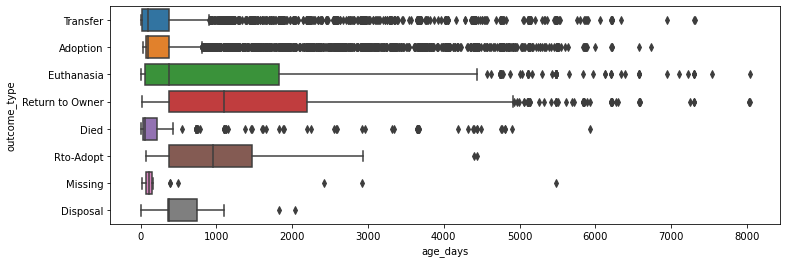

In [6]:
plt.subplots(figsize = (12, 4))
sns.boxplot(data = df, x = 'age_days', y = 'outcome_type', orient = 'h',
           order = df['outcome_type'].value_counts().index)


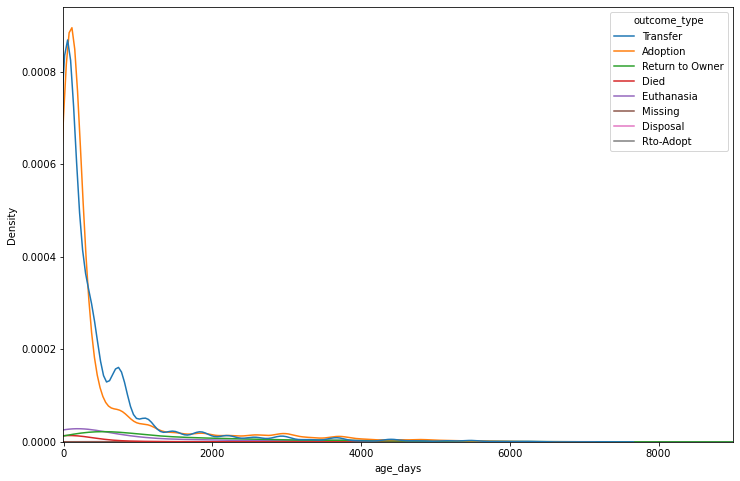

In [7]:
plt.figure(figsize = (12,8))
sns.kdeplot(data = df, x = 'age_days', hue = 'outcome_type')
plt.xlim(-5, 9000)
plt.show()

In [8]:
print(df.dtypes)
df.drop(columns = ['dob_year', 'dob_month', 'dob_monthyear'])
from sklearn.preprocessing import LabelEncoder

columns = ['breed', 'color', 'name', 'sex_upon_outcome', 'outcome_type', 'Spay/Neuter', 'coat_pattern',
          'color1', 'color2', 'coat']
df2 = df[columns]
def encoder(df):
    for cols in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[cols])
        df[cols] = label_encoder.transform(df[cols])
        
    return df

age_upon_outcome                object
animal_id                       object
animal_type                     object
breed                           object
color                           object
date_of_birth           datetime64[ns]
datetime                datetime64[ns]
monthyear                       object
name                            object
outcome_subtype                 object
outcome_type                    object
sex_upon_outcome                object
count                            int64
sex                             object
Spay/Neuter                     object
Periods                          int64
Period Range                     int64
outcome_age_(days)               int64
outcome_age_(years)            float64
Cat/Kitten (outcome)            object
sex_age_outcome                 object
age_group                       object
dob_year                         int64
dob_month                        int64
dob_monthyear                   object
outcome_month            

In [9]:
df = encoder(df)
df = df[['breed', 'color', 'name', 'sex_upon_outcome', 'outcome_type', 'Spay/Neuter', 'coat_pattern',
          'color1', 'color2', 'coat', 'age_days']]


C:\Users\alice\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x000001E6EDAC6DC0>>

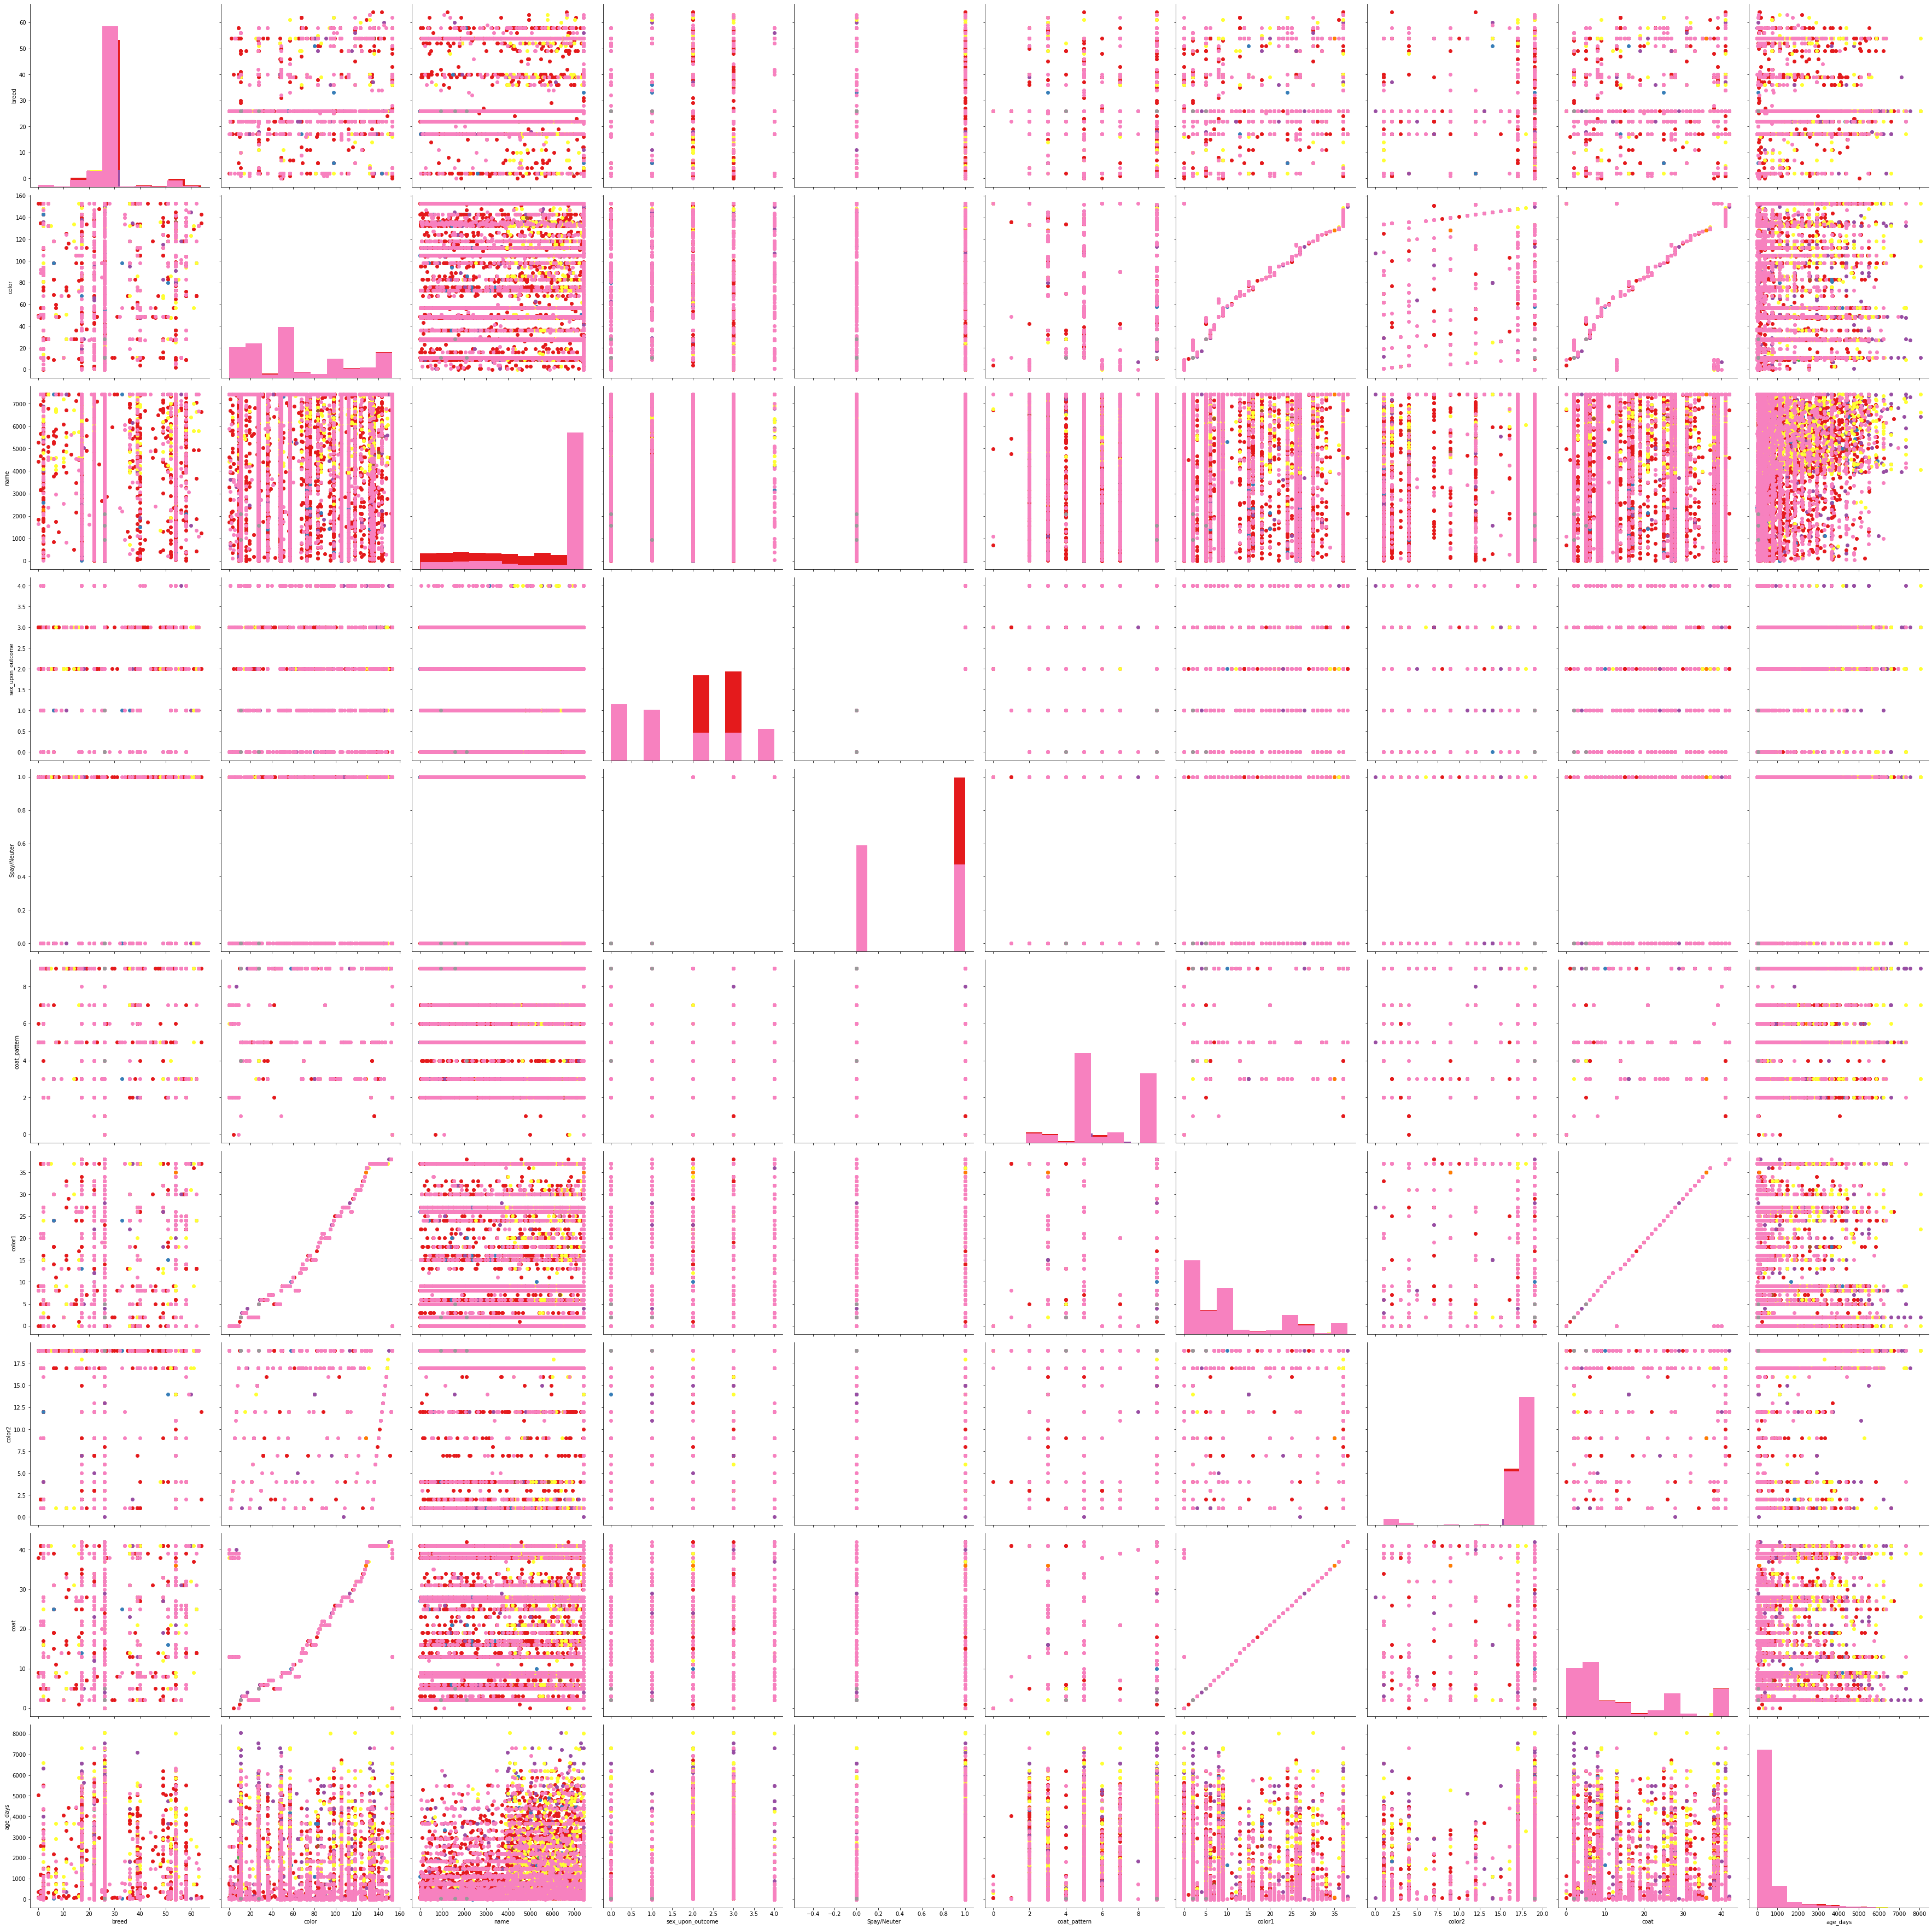

In [10]:
#correlation
g = sns.PairGrid(data = df, hue = 'outcome_type', size = 5, palette = 'Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend

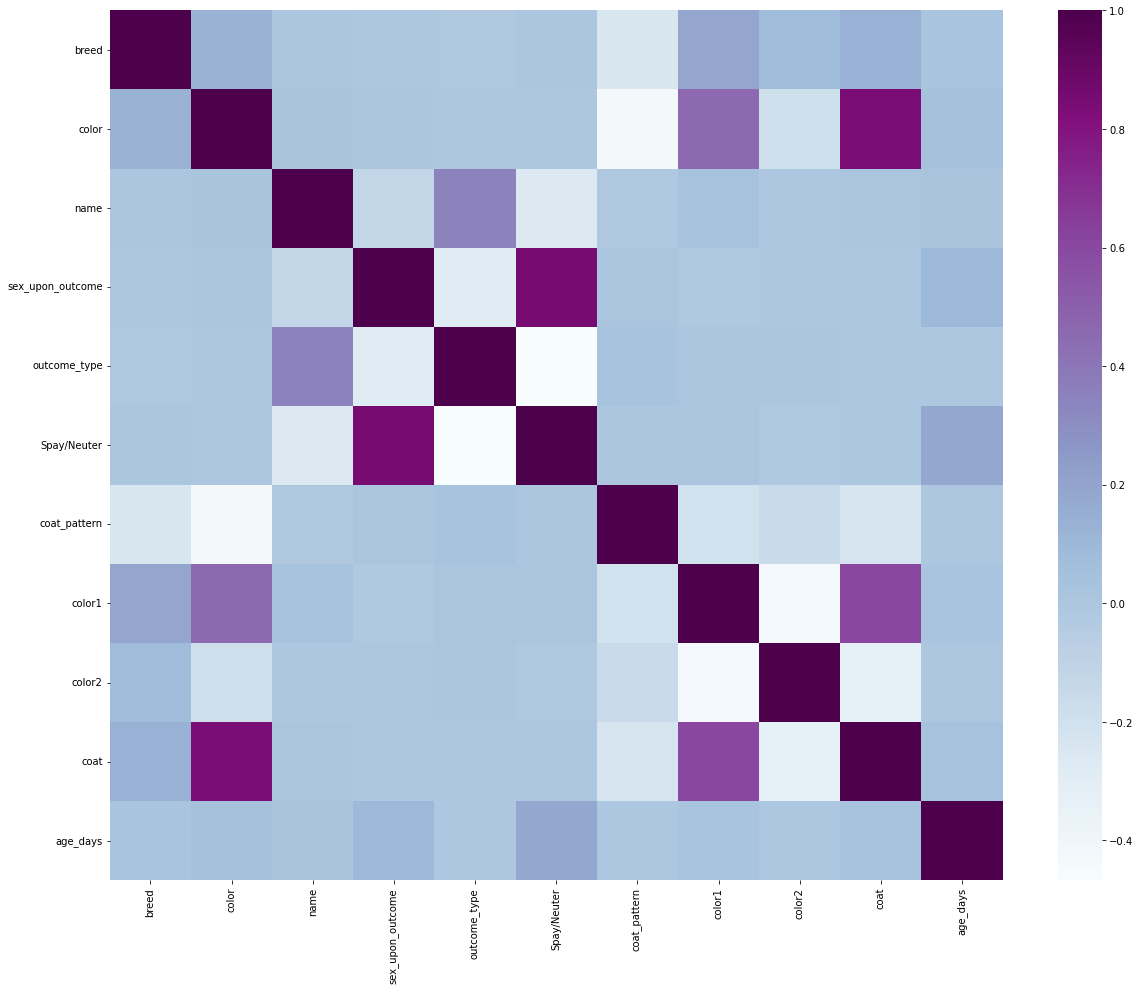

In [11]:
plt.figure(figsize = (20, 16))
sns.heatmap(df.corr(), cmap = 'BuPu')
#After this, we can see that coat and color are highly correlated, so I will drop the color columns
df = df.drop(columns = 'color')

In [12]:
x = df.drop('outcome_type', axis = 1)
y = df['outcome_type']
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
#Naive Bayes
from sklearn.metrics import roc_auc_score
nb = GaussianNB()
clf_fit = nb.fit(x_train, y_train)

#predict
pred_nb = nb.predict(x_test)

#acc and pre
acc_nb = balanced_accuracy_score(y_test, pred_nb)
roc_nb = roc_auc_score(y_test, clf_fit.predict_proba(x_test), multi_class = 'ovr')

print('Naive Bayes accuracy score: ' , acc_nb)
print('Naive Bayes ROC AUC score: ', roc_nb)


Naive Bayes accuracy score:  0.18668527870616514
Naive Bayes ROC AUC score:  0.5970748530895137


In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

grid = {'min_samples_split': [5, 10, 20, 50, 100]}
clf_tree = GridSearchCV(tree, grid, cv=5)
tree_fit = clf_tree.fit(x_train, y_train)

pred_tree = clf_tree.predict(x_test)

acc_tree = balanced_accuracy_score(pred_tree, y_test)
roc_tree = roc_auc_score(y_test, tree_fit.predict_proba(x_test), multi_class = 'ovr')

print('Accuracy Score for Decision Tree: ',acc_tree)
print('Decision Tree ROC AUC score: ', roc_tree)

C:\Users\alice\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[0.96875    0.         0.         ... 0.         0.03125    0.        ]
 [0.92307692 0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.98979592 0.        ]
 ...
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.15789474 0.         0.         ... 0.         0.36842105 0.        ]
 [0.42857143 0.         0.         ... 0.         0.55102041 0.        ]]
Accuracy Score for Decision Tree:  0.4789913048884341
Decision Tree ROC AUC score:  0.7553053884384651


C:\Users\alice\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [29]:
#Random Forests
rf = RandomForestClassifier()
grid = {'n_estimators': [100,200,300,400,500], 'max_depth': [2, 5, 10]}
clf_rf = GridSearchCV(rf, grid, cv=5)
rf_fit = clf_rf.fit(x_train, y_train)
pred_rf = clf_rf.predict(x_test)
acc_rf = balanced_accuracy_score(pred_rf, y_test)
auc_rf = roc_auc_score(y_test, rf_fit.predict_proba(x_test), multi_class = 'ovr')
print('Accuracy Score RF: ',acc_rf)
print('RF AUC ROC score: ', auc_rf)

C:\Users\alice\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy Score RF:  0.5760486464484333
RF AUC ROC score:  0.8407221798693345


C:\Users\alice\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [34]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(max_iter = 1000)
lm_fit = lm.fit(x_train, y_train)
pred_lm = lm.predict(x_test)
acc_lm = balanced_accuracy_score(pred_lm, y_test)
auc_lm = roc_auc_score(y_test, lm_fit.predict_proba(x_test), multi_class = 'ovr')
print('Accuracy score for linear regression: ',acc_lm)
print('Linear Regression ROC AUC score: ', auc_lm)


Accuracy score for linear regression:  0.5002705590469
Linear Regression ROC AUC score:  0.7706663372442875


C:\Users\alice\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

grid = {'n_neighbors': np.arange(1,100)}
clf_knn = GridSearchCV(knn, grid, cv=5)
knn_fit = clf_knn.fit(x_train, y_train)

pred_knn = clf_knn.predict(x_test)
acc_knn = balanced_accuracy_score(pred_knn, y_test)
auc_knn = roc_auc_score(y_test, knn_fit.predict_proba(x_test), multi_class = 'ovr')

print('Accuracy score for KNN: ',acc_knn)
print('ROC AUC score for KNN: ', auc_knn)

C:\Users\alice\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy score for KNN:  0.5899512214556171
ROC AUC score for KNN:  0.6869365429166407


C:\Users\alice\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
